# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [207]:
#.tsv são separados por tab "\t", assim como .csv é separado por ","
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')

### Step 4. See the first 10 entries

In [208]:
chipo.head(10)
chipo.item_name.value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

### Step 5. Create a histogram of the top 5 items bought

([<matplotlib.axis.XTick at 0x7fdd9a6366a0>,
 <a list of 5 Text xticklabel objects>)

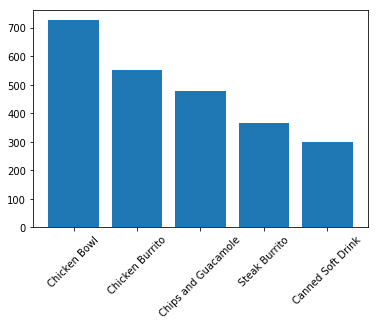

In [209]:
#Os 5 produtos mais comprados
top5 = chipo.item_name.value_counts()[:5]

#Representa o tamanho do vetor que vai estar no eixo horizontal (=5)
x = np.arange(len(top5))

#Representa as quantidades dos 5 mais pedidos
y = top5.values

#Plota o gráfico
plt.bar(x,y)

#Altera label do eixo horizontal de integers para os nomes dos produtos
plt.xticks(x, top5.index, rotation='45')

In [210]:
#Uma forma mais inteligente de fazer

In [211]:
#Retorna um dataframe só com essas colunas
chipo_redux = chipo.filter(['quantity','item_name'])

In [212]:
#agrupar por item e somar as quantidades
#colocar em ordem crescenter
#retornar apenas os 5 primeiros

top5_versao2 = chipo_redux.groupby(by='item_name').sum().sort_values(by='quantity', ascending=False).head(5)
top5_versao2

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


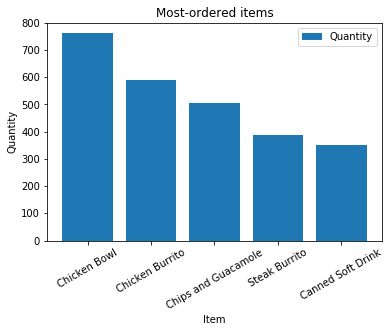

In [213]:
plt.bar(np.arange(len(top5_versao2)), top5_versao2.quantity, label='Quantity')

#Colocar os valores corretos no eixo horizontal
plt.xticks(np.arange(len(top5_versao2)), top5_versao2.index.values, rotation='30')

#Nomear os eixos
plt.xlabel('Item')
plt.ylabel('Quantity')
plt.title('Most-ordered items')
plt.legend()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [214]:
#Formatar a coluna de preços para o type adequado
chipo['item_price'] = chipo['item_price'].apply(lambda x: str(x).replace('$','')).astype('float64')

#Agrupar o dataframe por item_name, somando quantity e item_price
chipo_redux2 = chipo.groupby(by='item_name').sum()

#Atribuir a item_price o valor unitário dos produtos
chipo_redux2['item_price'] = chipo_redux2['item_price']/chipo_redux2['quantity']

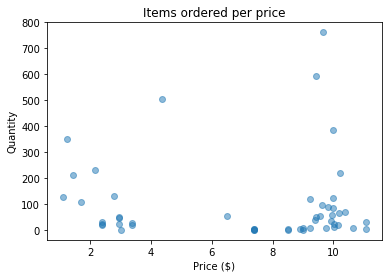

In [215]:
plt.scatter(chipo_redux2['item_price'], chipo_redux2['quantity'], alpha=0.5)
plt.xlabel('Price ($)')
plt.ylabel('Quantity')
plt.title('Items ordered per price')

### Step 7. BONUS: Create a question and a graph to answer your own question.

### Fazer um gráfico de pizza que mostre quantos pedidos incluíram bebida e quantos não

In [248]:
#Adicionar coluna comparativa 

chipo['beverage'] = 0
bebidas = ['Canned Soft Drink','Bottled Water','Canned Soda','6 Pack Soft Drink', 'Izze','Nantucket Nectar']
